In [1]:
### Install Necessary Libraries ###


import sys
!{sys.executable} -m pip install geopy shapely

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [59]:
def convertToMeters(longitude, latitude):
    return ((85390*longitude), (111030*latitude))


def distance(pt1, pt2):
    dist1 = abs(pt1[0]-pt2[0])
    dist2 = abs(pt1[1] - pt2[1])
    x, y = convertToMeters(dist1,dist2)
    ## print x,y
    return np.sqrt((x**2+y**2))

def findClusters(df):
    data = df.values
    cluster = []
    clusters = []
    startPt = data[0]
    
    for i in range(1, len(data)):
        if distance(startPt, data[i]) <= 100:
            #print 'Added line'
            cluster.append(list(data[i]))
        elif len(cluster) > 0 and abs(cluster[0][2] - cluster[-1][2]) > 900:
            clusters.append(cluster)
            cluster = []
            startPt = data[i]
            #print 'Added cluster'
        else:
            startPt = data[i]
    #print abs(cluster[0][2] - cluster[-1][2])
    #print len(cluster) > 0
    if len(cluster) > 0 and abs(cluster[0][2] - cluster[-1][2]) > 900:
        #print 'Added cluster'
        clusters.append(cluster)
    return clusters

def haversine(coord1, coord2):

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = (coord1[0],coord1[1])
    lon2, lat2 = (coord2[0]),coord2[1]

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    
    return meters

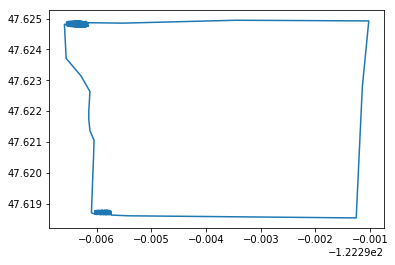

In [60]:
df = pd.read_csv('Data/gps_data.csv').filter(items=['X','Y','time'])

#print df.head()

plt.plot(df['X'],df['Y'])

Number of Clusters: 3


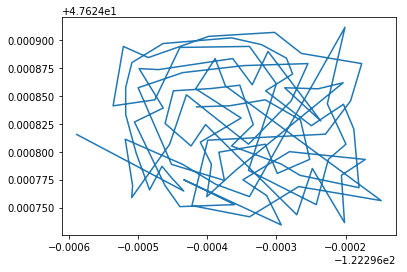

In [64]:
clusters = findClusters(df)
num_clusters = len(clusters)
print 'Number of Clusters: '+str(num_clusters)

for i in range(0, num_clusters):
    cluster_df = pd.DataFrame(data=clusters[i], columns=['X','Y','time'])
    plt.plot(cluster_df['X'],cluster_df['Y'])